In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('../unseen_species_model/results/estimations.csv')
df = df[df['decade']<=1800]
df = df.rename(columns = {'decade':'year', 'region':'region_name'})


,N_est,lower,upper,year,region_name
1544,8.678633,4.593700,13.332903,-320,Latin World
1545,8.211822,4.574436,12.439514,-260,Latin World
1546,24.050534,13.949200,35.646255,-220,Latin World
1547,7.980297,4.688935,11.769222,-210,Latin World
1548,15.784808,9.697916,22.860140,-180,Latin World
1549,7.868504,4.899566,11.278192,-170,Latin World
1550,109.851255,69.279394,156.297140,-160,Latin World
1551,7.826021,5.002519,11.016318,-150,Latin World
1552,31.226392,20.300029,43.502752,-140,Latin World
1553,15.575664,10.319807,21.482113,-130,Latin World


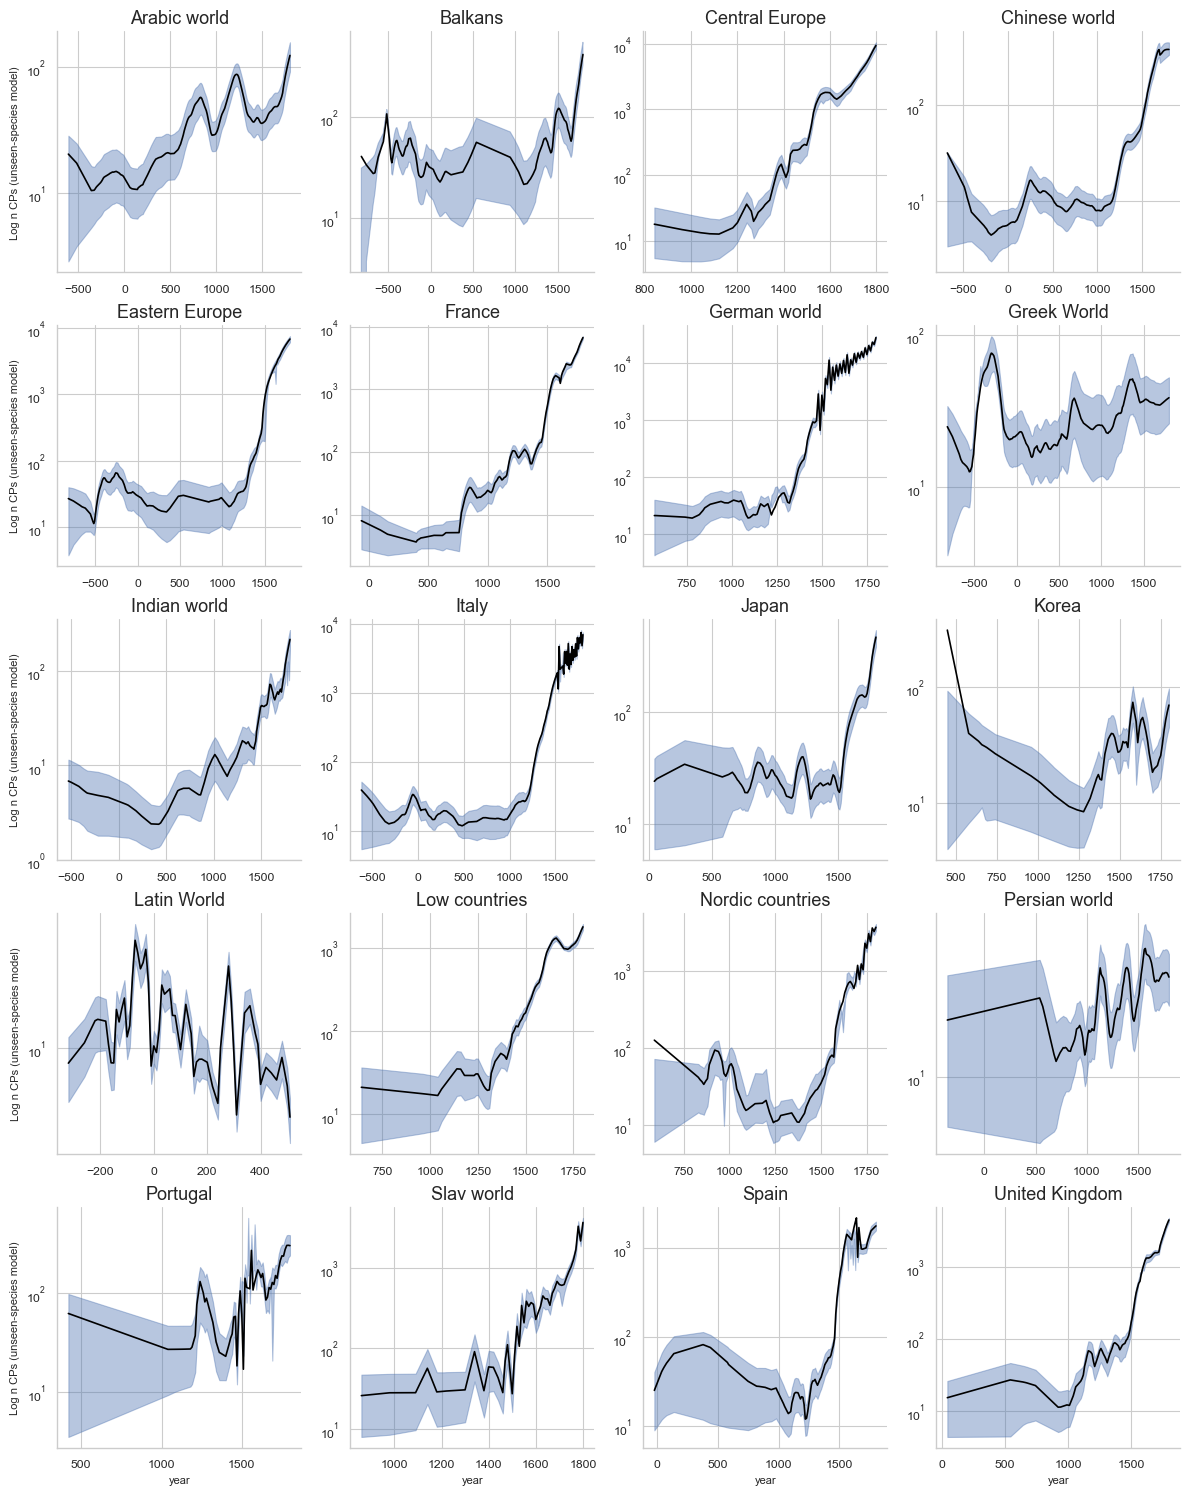

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

# Custom function for plotting
def lowess_fill_plot(x, y, lower, upper, color, **kwargs):
    ax = plt.gca()  # Get current axis
    ax.set_yscale('log')

    # LOWESS regression
    lowess_results = sm.nonparametric.lowess(y, x, frac=lowess_span)
    ax.plot(x, lowess_results[:, 1], color='black', label='LOWESS')

    # Calculating LOWESS for lower and upper bounds
    lowess_lower = sm.nonparametric.lowess(lower, x, frac=lowess_span)
    lowess_upper = sm.nonparametric.lowess(upper, x, frac=lowess_span)

    # Filling between lower and upper LOWESS bounds
    ax.fill_between(x, lowess_lower[:, 1], lowess_upper[:, 1], alpha=0.4, color=color)

    ax.legend()

# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set(style="whitegrid", context="paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Adjust the lowess_span as per your requirement
lowess_span = 0.1

# Create a facet plot with one plot per region
g = sns.FacetGrid(df, col="region_name", col_wrap=4, height=3, sharex=False, sharey=False)

# Use the custom function for plotting
g = g.map(lowess_fill_plot, "year", "N_est", "lower", "upper", color='b')

# Find the global minimum and maximum year
global_min_year = df["year"].min()
global_max_year = df["year"].max()

"""# Adjust the x-axis scale for each plot
for ax in g.axes:
    ax.set_xlim(global_min_year, global_max_year)"""

# Set titles and y-labels
g.set_titles("{col_name}", size=13)
g.set_ylabels("Log n CPs (unseen-species model)")

plt.savefig("figures/unseen_species_model/facet_plot_regions.png", dpi=300)
# Show the plot
plt.show()
